
### Source code for this blog post 
[Here](https://github.com/Xianzhiwang1/CS0451-page-site/tree/main/posts/) is a link to the source code for this Penguin Classification blog post.

### Reference for this blog post
[Here](https://middlebury-csci-0451.github.io/CSCI-0451/assignments/blog-posts/blog-post-penguins.html) is a link to the main reference we are using when creating this blog post.

# Introduction.
In this blog post I am going to use standard libraries to classify Palmer Penguins using supervised learning. 



Our goal is to classify three types of penguins, `Adelie`, `Chinstrap`, and `Gentoo`. Let's begin!

In [1]:
%load_ext autoreload
%autoreload 2

First, let's import some libraries, and let us load in the data using the function `read_csv`. 

We also need to import the class `PG` from our `penguins.py` source file.

In [40]:
# from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons, make_circles
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (4,4)
import numpy as np
np.random.seed(42)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_decision_regions
np.seterr(all="ignore")
import pandas as pd

In [3]:
train_url = "https://raw.githubusercontent.com/middlebury-csci-0451/CSCI-0451/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)

In [27]:
from penguins import PG 
PG = PG(train["Species"])

Let us use the `prepare_data` function to generate our training data, and this function is simply a collection of several lines of code that we would like to run first after read in the raw data, and the most convenient way is to put those steps into a function.  

In [9]:
X_train, y_train = PG.prepare_data(train)  

In [33]:
print(X_train.columns)
X_train.head(2)

Index(['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)',
       'Island_Biscoe', 'Island_Dream', 'Island_Torgersen',
       'Stage_Adult, 1 Egg Stage', 'Clutch Completion_No',
       'Clutch Completion_Yes', 'Sex_FEMALE', 'Sex_MALE'],
      dtype='object')


,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,"Stage_Adult, 1 Egg Stage",Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
1,45.1,14.5,215.0,5000.0,7.63220,-25.46569,True,False,False,True,False,True,True,False
2,41.4,18.5,202.0,3875.0,9.59462,-25.42621,False,False,True,True,False,True,False,True


# Choosing Features

In [64]:
all_qual_cols = []
all_qual_cols = ["Clutch Completion", "Sex", "Island"]
all_quant_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 
                  'Body Mass (g)', 'Island_Biscoe', 'Island_Dream', 'Island_Torgersen',
                  'Stage_Adult, 1 Egg Stage', 'Clutch Completion_No',
                  'Clutch Completion_Yes', 'Sex_FEMALE', 'Sex_MALE']

In [65]:
PG.select_combin_Logistic(df=X_train, y=y_train, all_qual_cols=all_quant_cols, all_quant_cols=all_quant_cols)

/home/xianzhiwang/miniforge3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/xianzhiwang/miniforge3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [66]:
print(max([-10, 5, 3], key=abs))
print(f"The combination of columns that achieves the highest scores is: {max(PG.feature_score_pair, key = PG.feature_score_pair.get)}")
print(max(PG.feature_score_pair.values()))

-10
The combination of columns that achieves the highest scores is: ('Culmen Length (mm)', 'Culmen Depth (mm)', 'Body Mass (g)')
0.99609375


# Model Choices

In [67]:
test_url = "https://raw.githubusercontent.com/middlebury-csci-0451/CSCI-0451/main/data/palmer-penguins/test.csv"
test = pd.read_csv(test_url)
X_test, y_test = PG.prepare_data(test)

In [106]:
cols = ["Flipper Length (mm)", "Body Mass (g)", "Clutch Completion_No", "Clutch Completion_Yes"]
cols = ['Flipper Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)'] 
cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Body Mass (g)']


cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Body Mass (g)', 
        'Sex_FEMALE', 'Sex_MALE']

cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Body Mass (g)', 
        'Island_Biscoe', 'Island_Dream', 'Island_Torgersen']

cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Body Mass (g)', 
        'Clutch Completion_No', 'Clutch Completion_Yes'] 

cols = ['Culmen Depth (mm)', 'Body Mass (g)',
        'Island_Biscoe', 'Island_Dream', 'Island_Torgersen']
LR = LogisticRegression()
LR.fit(X_train[cols], y_train)
LR.score(X_test[cols], y_test) 

/home/xianzhiwang/miniforge3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7941176470588235

In [107]:
print(f"The LR.score() on testing data is: {LR.score(X_test[cols], y_test)}")

The LR.score() on testing data is: 0.7941176470588235


In [109]:
cross_v_score = cross_val_score(LR, X_test[cols], y_test, cv = 6)
print(f"the cross validation scores are: {cross_v_score}") 

the cross validation scores are: [0.83333333 0.83333333 0.81818182 0.81818182 0.72727273 0.81818182]


['Culmen Depth (mm)', 'Body Mass (g)', 'Island_Biscoe', 'Island_Dream', 'Island_Torgersen']


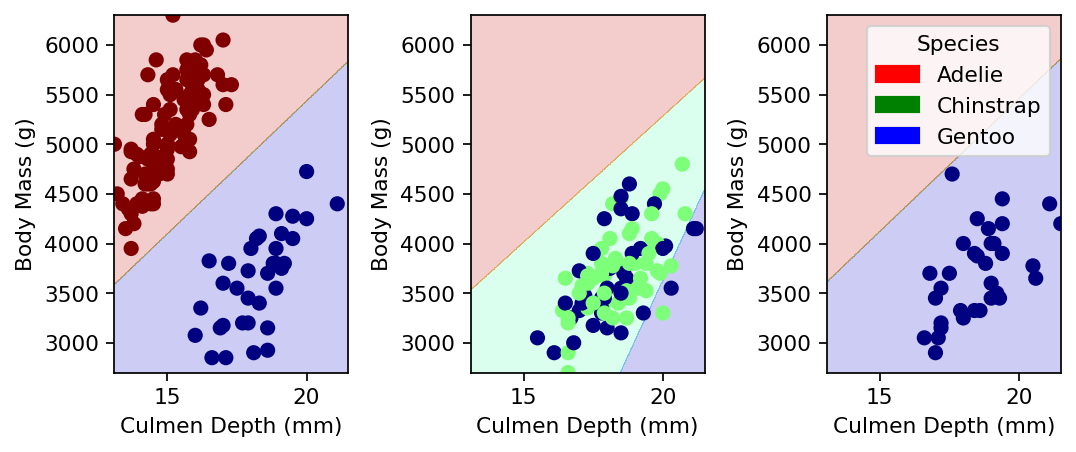

In [110]:
# plt.rcParams["figure.figsize"] = (4,4)
print(cols)
plt.rcParams['figure.dpi'] = 156
# PG.plot_regions(LR, X_test[cols], y_test)
PG.plot_regions(LR, X_train[cols], y_train)